<h1>Predictive Analytics: Predict Mobile Prices To Avoid Scams<h1>


# Import Library

In [ ]:
# lastest update module python
!pip install -U scikit-learn
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# upload files to google colab
from google.colab import files

# data preprocessing
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Kaggle API for Dataset

In [ ]:
# unggah file to google colabs
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kurnivannoery","key":"9d65720ebbcb40894e71244fd64ecac1"}'}

In [ ]:
# create .kaggle folder inside the root folder
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# copy kaggle.json file in the current active directory to .kaggle folder
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading datasets using Kaggle CLI
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 37.3MB/s]


In [ ]:
# Extract the zip file
%rm -rf dataset
%mkdir dataset
%cd dataset
!unzip /content/mobile-price-classification.zip

/content/dataset
Archive:  /content/mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


# Data Preparation

In [ ]:
price_df = pd.read_csv("/content/dataset/train.csv")

In [ ]:
price_df_importance = pd.read_csv("/content/dataset/train.csv")

## Feature Importance

In [ ]:
X = price_df_importance.drop('price_range', axis=1).values
y = price_df_importance['price_range'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

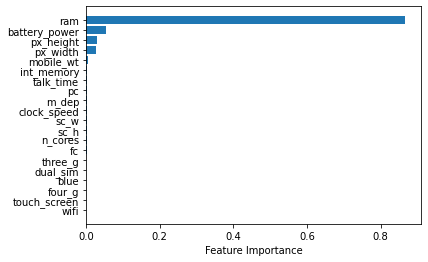

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(price_df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

## Data Splitting

In [ ]:
# Splitting between independent variables and target variables
variable = ['px_height', 'px_width', 'pc', 'fc', 'n_cores','int_memory', 'ram', 'battery_power']

X = price_df[variable].values
y = price_df['price_range'].values

In [ ]:
price_df[variable].max()

px_height        1960
px_width         1998
pc                 20
fc                 19
n_cores             8
int_memory         64
ram              3998
battery_power    1998
dtype: int64

In [ ]:
price_df[variable].min()

px_height          0
px_width         500
pc                 0
fc                 0
n_cores            1
int_memory         2
ram              256
battery_power    501
dtype: int64

In [ ]:
# Splitting between train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [ ]:
print(f'Total Data        :{len(X)}')
print(f'Total Train Data  :{len(X_train)}')
print(f'Total Test Data   :{len(X_test)}')

Total Data        :2000
Total Train Data  :1600
Total Test Data   :400


## Standardize Values

StandardScaler converts the data distribution to either a Gaussian Distribution or a Normal Distribution.

In [ ]:
# Sample before standardization
print(X_train[0:3])
print("")
print(X_test[0:3])

[[ 292  695   12   10    1   61 1731 1845]
 [1350 1949   15   12    7   32  445 1271]
 [  42 1161   12    4    8   57 3969  788]]

[[1215 1472   18   16    6   32 3566 1773]
 [ 287  593   20    2    5   12 1824 1982]
 [ 657 1657   14    0    4   56  562  548]]


In [ ]:
# StandardScaler function initialization
scaler = MinMaxScaler()

In [ ]:
# StandardScaler train data
X_train = scaler.fit_transform(X_train)

# StandardScaler test data
X_test = scaler.fit_transform(X_test)

In [ ]:
# Sample after standardization
print(X_train[0:3])
print("")
print(X_test[0:3])

[[0.14897959 0.13017356 0.6        0.52631579 0.         0.9516129
  0.39417424 0.89772727]
 [0.68877551 0.96728972 0.75       0.63157895 0.85714286 0.48387097
  0.05050775 0.51403743]
 [0.02142857 0.44125501 0.6        0.21052632 1.         0.88709677
  0.99225013 0.19117647]]

[[0.6328125  0.65278711 0.9        0.88888889 0.71428571 0.48387097
  0.8861745  0.85083612]
 [0.14947917 0.06245803 1.         0.11111111 0.57142857 0.16129032
  0.41852349 0.99063545]
 [0.3421875  0.77703156 0.7        0.         0.42857143 0.87096774
  0.07973154 0.03143813]]


# Modeling

## Baseline Model with *Support Vector Machine (SVM)*

In [ ]:
# baseline modeling
base_model = SVC()

# training model
base_model.fit(X_train, y_train)

SVC()

In [ ]:
# prediction model
y_pred = base_model.predict(X_test)

In [ ]:
# classification report model baseline
cr_base = classification_report(y_test, y_pred, output_dict=True, target_names=['low cost', 'medium cost', 'high cost', 'very high cost'])
pd.DataFrame(cr_base).T

,precision,recall,f1-score,support
low cost,0.990000,0.9900,0.990000,100.0000
medium cost,0.920792,0.9300,0.925373,100.0000
high cost,0.865979,0.8400,0.852792,100.0000
very high cost,0.911765,0.9300,0.920792,100.0000
accuracy,0.922500,0.9225,0.922500,0.9225
macro avg,0.922134,0.9225,0.922239,400.0000
weighted avg,0.922134,0.9225,0.922239,400.0000


In [ ]:
# confusion matrix model baseline
cf_base = confusion_matrix(y_test, y_pred)

## *Support Vector Machine (SVM)* Model Development with *Hyper Parameter Tuning* using GridSearchCV

Reference the *Support Vector Machine (SVM)* Model parameters used based on [*scikit-learn*](https://scikit-learn.org/stable/modules/svm.html) and [geeksforgeeks](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/).

In [ ]:
# Set the hyperparameter to be tuned
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] 
}

In [ ]:
# setting StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# modelling with GridSearchCV
grid = GridSearchCV(base_model, parameters, cv=skf, verbose=1, scoring='accuracy', n_jobs=-1)

# training model
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameter: ", grid.best_estimator_)
print("Score: ", grid.best_score_)

Best parameter:  SVC(C=1000, gamma=0.01)
Score:  0.943125


In [ ]:
# modelling best parameter
best_model = grid.best_estimator_

# training model
best_model.fit(X_train, y_train)

SVC(C=1000, gamma=0.01)

In [ ]:
# prediction model
y_pred = best_model.predict(X_test)

In [ ]:
# classification report model best parameter
cr_best = classification_report(y_test, y_pred, output_dict=True, target_names=['low cost', 'medium cost', 'high cost', 'very high cost'])
pd.DataFrame(cr_best).T

,precision,recall,f1-score,support
low cost,1.000000,1.0000,1.000000,100.0000
medium cost,0.979592,0.9600,0.969697,100.0000
high cost,0.930693,0.9400,0.935323,100.0000
very high cost,0.960396,0.9700,0.965174,100.0000
accuracy,0.967500,0.9675,0.967500,0.9675
macro avg,0.967670,0.9675,0.967549,400.0000
weighted avg,0.967670,0.9675,0.967549,400.0000


In [ ]:
# confusion matrix model best parameter
cf_best = confusion_matrix(y_test, y_pred)

# Model Evaluation

## Matrix comparison between the baseline model and the developed model

In [ ]:
print("Classification Report Model Baseline")
pd.DataFrame(cr_base).T

Classification Report Model Baseline


,precision,recall,f1-score,support
low cost,0.990000,0.9900,0.990000,100.0000
medium cost,0.920792,0.9300,0.925373,100.0000
high cost,0.865979,0.8400,0.852792,100.0000
very high cost,0.911765,0.9300,0.920792,100.0000
accuracy,0.922500,0.9225,0.922500,0.9225
macro avg,0.922134,0.9225,0.922239,400.0000
weighted avg,0.922134,0.9225,0.922239,400.0000


In [ ]:
print("Classification Report Model Best Parameter")
pd.DataFrame(cr_best).T

Classification Report Model Best Parameter


,precision,recall,f1-score,support
low cost,1.000000,1.0000,1.000000,100.0000
medium cost,0.979592,0.9600,0.969697,100.0000
high cost,0.930693,0.9400,0.935323,100.0000
very high cost,0.960396,0.9700,0.965174,100.0000
accuracy,0.967500,0.9675,0.967500,0.9675
macro avg,0.967670,0.9675,0.967549,400.0000
weighted avg,0.967670,0.9675,0.967549,400.0000


## Comparison of the confusion matrix between the baseline model and the developed model

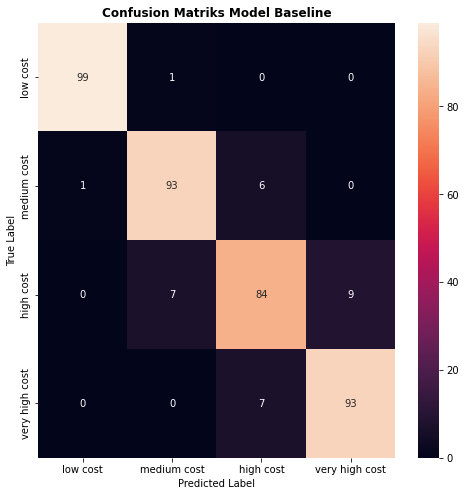

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cf_base, annot=True, fmt='g')

ax.set_yticklabels(['low cost', 'medium cost', 'high cost', 'very high cost'])
ax.set_xticklabels(['low cost', 'medium cost', 'high cost', 'very high cost'])

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax.set_title('Confusion Matriks Model Baseline', fontweight='bold')
plt.show()

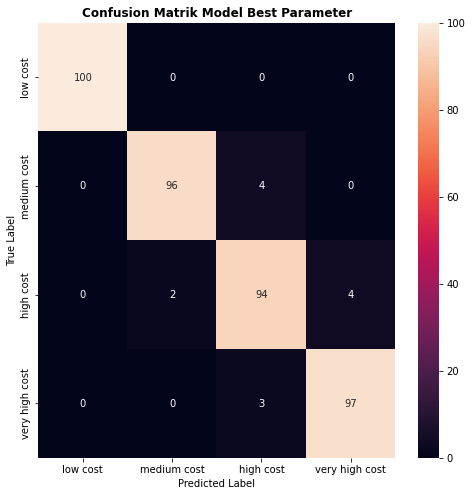

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cf_best, annot=True, fmt='g')

ax.set_yticklabels(['low cost', 'medium cost', 'high cost', 'very high cost'])
ax.set_xticklabels(['low cost', 'medium cost', 'high cost', 'very high cost'])

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax.set_title('Confusion Matrik Model Best Parameter', fontweight='bold')
plt.show()

# Save Model

In [ ]:
%cd /content
%rm -rf model
%mkdir model
%cd model

/content
/content/model


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

# Conclusion

The model used to predict the price of mobile phones to avoid fraud has been completed. The level of accuracy is already high because it uses SVM. For other developments, it can be done by choosing a model that is not complicated but has high accuracy.

**Reference**
*   Dokumentasi Scikit-Learn: https://scikit-learn.org/stable/modules/classes.html
*   Dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification